Train Agent to play Tic-Tac-Toe
=========================

This notebook serves to train a DQN agent to play against another learning agent, in order to learn how to play the game and then it could be used to play against a human.

### Import dependencies

In [1]:
from tateti.agent.base import play_one
from tateti.agent.dqn import DQNAgent
from tateti.environment.tictactoe import Environment
from tateti.util.plot import plot_moving_avg, plot

import numpy as np
import random

import argparse

Using TensorFlow backend.


### Create and configure environment to use for playing Tic-Tac-Toe

In [2]:
reward_function = "standard"  # Reward function to use on the environment
seed = 123  # Define seed for random generators
print("Using seed=%i" % seed)  
env = Environment(reward_function=reward_function, seed=seed)

print("Environment created!")

Using seed=123
Environment created!


### Create agents that are going to learn to play Tic-Tac-Toe

In [3]:
# Path to filename for saving the best agent (and even load a saved agent as well)
path_to_model = "/data/tateti_model.pkl"

# Parameters of DQN agent
gamma = 0.99  # Discount factor
replay_mem = 1e3  # Max amount of sequences to store in experience replay memory
batch_size = 10  # Number of sequences to sample from experience replay memory while applying it to agent
phi_function = "scaled"  # Phi function to use for transforming states into a better representation for the agent
# strategy_function: to deal with exploration-exploitation dilemma

# TODO: not having deterministic results when strategy_function="boltzmann"
agent_x = (DQNAgent(env=env, gamma=gamma, phi_function=phi_function, strategy_function="egreedy",
                    memory_size=replay_mem, batch_size=batch_size)
          #.load(path_to_model)  # Uncomment to load a previous saved agent
          )

agent_o = (DQNAgent(env=env, gamma=gamma, phi_function=phi_function, strategy_function="egreedy",
                    memory_size=replay_mem, batch_size=batch_size)
          #.load(path_to_model)  # Uncomment to load a previous saved agent
          )

Instructions for updating:
Colocations handled automatically by placer.


### Configure experiments to perform

In [4]:
N = 200  # Number of episodes to run 
total_rewards = {Environment.SYMBOL_X: np.empty(N), Environment.SYMBOL_O: np.empty(N)}  # Total of reward obtained per agent

### Start playing and learning!

In [5]:
for n in range(N):
    total_reward, steps, is_over = play_one(agent_x, agent_o, env)

    for sym in total_reward:
        total_rewards[sym][n] = total_reward[sym]

    if n % 10 == 0:
        avg_rew = {Environment.sym_repr[s]: v[max(0, n-10):(n+1)].mean() for (s, v) in total_rewards.items()}
        print("Episode:%i, avg reward (last 10): %s" % (n, avg_rew))
        print("Current status of board:")
        env.draw_board(logger_func=print)
        print("Score board: %s" % str(env.score))

    seed = random.randint(0, 1000)

    env.reset()

Instructions for updating:
Use tf.cast instead.


2019-03-07 01:19:00,302 - tateti.agent.base - INFO - GAME OVER! Winner: None


Episode:0, avg reward (last 10): {'x': -22.0, 'o': -24.0}
Current status of board:
-------------
| x | o | x |
-------------
| x | o | o |
-------------
| o | x | x |
-------------
Score board: {'x': 0, 'o': 0, ' ': 1}


2019-03-07 01:19:00,885 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-07 01:19:01,056 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-07 01:19:01,381 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-07 01:19:01,731 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-07 01:19:02,113 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-07 01:19:02,293 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-07 01:19:02,586 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-07 01:19:02,892 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-07 01:19:03,075 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-07 01:19:03,569 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-07 01:19:03,676 - tateti.agent.base - INFO - GAME OVER! Winner: o


Episode:10, avg reward (last 10): {'x': -7.0, 'o': -7.818181818181818}
Current status of board:
-------------
| x | o | o |
-------------
| x | x | o |
-------------
| o | x | x |
-------------
Score board: {'x': 2, 'o': 7, ' ': 2}


2019-03-07 01:19:03,839 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-07 01:19:04,029 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-07 01:19:04,279 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-07 01:19:04,851 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-07 01:19:05,105 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-07 01:19:05,400 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-07 01:19:05,623 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-07 01:19:05,997 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-07 01:19:06,231 - tateti.agent.base - INFO - GAME OVER! Winner: o


Episode:20, avg reward (last 10): {'x': -4.0, 'o': -5.363636363636363}
Current status of board:
-------------
| o | x | o |
-------------
| o | x | x |
-------------
| o |   | x |
-------------
Score board: {'x': 6, 'o': 12, ' ': 3}


2019-03-07 01:19:06,539 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-07 01:19:06,996 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-07 01:19:07,147 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-07 01:19:07,398 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-07 01:19:07,873 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-07 01:19:08,125 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-07 01:19:08,618 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-07 01:19:09,231 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-07 01:19:09,470 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-07 01:19:09,736 - tateti.agent.base - INFO - GAME OVER! Winner: x


Episode:30, avg reward (last 10): {'x': -5.636363636363637, 'o': -6.0}
Current status of board:
-------------
| o | o | x |
-------------
| x | x |   |
-------------
| x |   | o |
-------------
Score board: {'x': 12, 'o': 15, ' ': 4}


2019-03-07 01:19:10,263 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-07 01:19:10,443 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-07 01:19:10,815 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-07 01:19:11,166 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-07 01:19:11,253 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-07 01:19:11,373 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-07 01:19:11,523 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-07 01:19:11,894 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-07 01:19:11,995 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-07 01:19:12,300 - tateti.agent.base - INFO - GAME OVER! Winner: o


Episode:40, avg reward (last 10): {'x': -3.4545454545454546, 'o': -4.181818181818182}
Current status of board:
-------------
| o | o | x |
-------------
| o | x | x |
-------------
| o | x | o |
-------------
Score board: {'x': 16, 'o': 19, ' ': 6}


2019-03-07 01:19:12,833 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-07 01:19:13,014 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-07 01:19:13,245 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-07 01:19:13,449 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-07 01:19:13,591 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-07 01:19:13,686 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-07 01:19:13,876 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-07 01:19:14,125 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-07 01:19:14,313 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-07 01:19:14,895 - tateti.agent.base - INFO - GAME OVER! Winner: None


Episode:50, avg reward (last 10): {'x': -5.181818181818182, 'o': -3.909090909090909}
Current status of board:
-------------
| o | x | o |
-------------
| x | o | x |
-------------
| x | o | x |
-------------
Score board: {'x': 21, 'o': 23, ' ': 7}


2019-03-07 01:19:15,344 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-07 01:19:15,455 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-07 01:19:15,580 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-07 01:19:15,968 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-07 01:19:16,260 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-07 01:19:16,447 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-07 01:19:16,671 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-07 01:19:16,859 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-07 01:19:18,204 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-07 01:19:18,697 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-07 01:19:18,812 - tateti.agent.base - INFO - GAME OVER! Winner: x


Episode:60, avg reward (last 10): {'x': -5.909090909090909, 'o': -11.0}
Current status of board:
-------------
| o |   | o |
-------------
| x | x | x |
-------------
| o | x | o |
-------------
Score board: {'x': 22, 'o': 31, ' ': 8}


2019-03-07 01:19:19,142 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-07 01:19:19,481 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-07 01:19:19,874 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-07 01:19:20,098 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-07 01:19:20,339 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-07 01:19:20,627 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-07 01:19:20,801 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-07 01:19:21,392 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-07 01:19:21,523 - tateti.agent.base - INFO - GAME OVER! Winner: x


Episode:70, avg reward (last 10): {'x': -5.090909090909091, 'o': -5.7272727272727275}
Current status of board:
-------------
| o | o |   |
-------------
|   | o | x |
-------------
| x | x | x |
-------------
Score board: {'x': 30, 'o': 33, ' ': 8}


2019-03-07 01:19:21,964 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-07 01:19:22,264 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-07 01:19:22,486 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-07 01:19:22,629 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-07 01:19:22,893 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-07 01:19:23,137 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-07 01:19:23,732 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-07 01:19:24,046 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-07 01:19:24,226 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-07 01:19:24,420 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-07 01:19:24,615 - tateti.agent.base - INFO - GAME OVER! Winner: x


Episode:80, avg reward (last 10): {'x': -5.090909090909091, 'o': -5.454545454545454}
Current status of board:
-------------
|   | o | x |
-------------
| x | o |   |
-------------
| x | o | o |
-------------
Score board: {'x': 33, 'o': 39, ' ': 9}


2019-03-07 01:19:24,743 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-07 01:19:25,774 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-07 01:19:26,372 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-07 01:19:26,660 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-07 01:19:26,867 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-07 01:19:27,184 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-07 01:19:27,329 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-07 01:19:27,557 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-07 01:19:27,725 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-07 01:19:27,830 - tateti.agent.base - INFO - GAME OVER! Winner: x


Episode:90, avg reward (last 10): {'x': -3.5454545454545454, 'o': -7.636363636363637}
Current status of board:
-------------
| o | x | x |
-------------
|   | o | x |
-------------
| x | o | o |
-------------
Score board: {'x': 38, 'o': 44, ' ': 9}


2019-03-07 01:19:28,364 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-07 01:19:28,596 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-07 01:19:28,783 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-07 01:19:28,960 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-07 01:19:29,321 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-07 01:19:29,615 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-07 01:19:29,750 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-07 01:19:29,848 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-07 01:19:30,198 - tateti.agent.base - INFO - GAME OVER! Winner: o


Episode:100, avg reward (last 10): {'x': -3.4545454545454546, 'o': -3.272727272727273}
Current status of board:
-------------
| o | o | o |
-------------
| x | x | o |
-------------
| x | o | x |
-------------
Score board: {'x': 42, 'o': 49, ' ': 10}


2019-03-07 01:19:30,521 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-07 01:19:30,683 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-07 01:19:30,862 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-07 01:19:31,245 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-07 01:19:31,574 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-07 01:19:31,785 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-07 01:19:32,255 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-07 01:19:32,570 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-07 01:19:32,764 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-07 01:19:32,997 - tateti.agent.base - INFO - GAME OVER! Winner: x


Episode:110, avg reward (last 10): {'x': -4.909090909090909, 'o': -3.6363636363636362}
Current status of board:
-------------
| x | x | x |
-------------
| o |   |   |
-------------
| x | o | o |
-------------
Score board: {'x': 47, 'o': 53, ' ': 11}


2019-03-07 01:19:33,229 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-07 01:19:33,439 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-07 01:19:33,808 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-07 01:19:34,091 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-07 01:19:34,292 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-07 01:19:34,476 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-07 01:19:34,742 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-07 01:19:35,205 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-07 01:19:35,322 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-07 01:19:35,459 - tateti.agent.base - INFO - GAME OVER! Winner: x


Episode:120, avg reward (last 10): {'x': -3.272727272727273, 'o': -3.6363636363636362}
Current status of board:
-------------
| o |   | x |
-------------
| o |   | o |
-------------
| x | x | x |
-------------
Score board: {'x': 50, 'o': 59, ' ': 12}


2019-03-07 01:19:35,687 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-07 01:19:35,937 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-07 01:19:36,262 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-07 01:19:36,665 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-07 01:19:37,022 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-07 01:19:37,201 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-07 01:19:37,416 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-07 01:19:37,739 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-07 01:19:37,843 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-07 01:19:38,467 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-07 01:19:38,600 - tateti.agent.base - INFO - GAME OVER! Winner: x


Episode:130, avg reward (last 10): {'x': -5.090909090909091, 'o': -4.7272727272727275}
Current status of board:
-------------
| x | o | x |
-------------
| o | x | o |
-------------
| o | x | o |
-------------
Score board: {'x': 55, 'o': 63, ' ': 13}


2019-03-07 01:19:38,706 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-07 01:19:38,828 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-07 01:19:39,195 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-07 01:19:39,920 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-07 01:19:40,149 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-07 01:19:40,252 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-07 01:19:40,470 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-07 01:19:40,806 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-07 01:19:40,927 - tateti.agent.base - INFO - GAME OVER! Winner: x


Episode:140, avg reward (last 10): {'x': -4.909090909090909, 'o': -5.0}
Current status of board:
-------------
| x | o | o |
-------------
| x |   |   |
-------------
| x |   |   |
-------------
Score board: {'x': 61, 'o': 67, ' ': 13}


2019-03-07 01:19:41,132 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-07 01:19:41,795 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-07 01:19:42,016 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-07 01:19:42,794 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-07 01:19:42,932 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-07 01:19:43,037 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-07 01:19:43,504 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-07 01:19:43,713 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-07 01:19:43,883 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-07 01:19:44,484 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-07 01:19:44,623 - tateti.agent.base - INFO - GAME OVER! Winner: o


Episode:150, avg reward (last 10): {'x': -5.818181818181818, 'o': -6.181818181818182}
Current status of board:
-------------
| o | o | x |
-------------
| x | x | x |
-------------
| o | x | o |
-------------
Score board: {'x': 65, 'o': 71, ' ': 15}


2019-03-07 01:19:44,875 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-07 01:19:45,356 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-07 01:19:46,089 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-07 01:19:46,475 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-07 01:19:47,043 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-07 01:19:47,240 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-07 01:19:47,866 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-07 01:19:48,016 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-07 01:19:48,148 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-07 01:19:48,264 - tateti.agent.base - INFO - GAME OVER! Winner: o


Episode:160, avg reward (last 10): {'x': -8.0, 'o': -6.181818181818182}
Current status of board:
-------------
| o |   |   |
-------------
| x | x | x |
-------------
| o | o |   |
-------------
Score board: {'x': 70, 'o': 72, ' ': 19}


2019-03-07 01:19:48,372 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-07 01:19:48,568 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-07 01:19:48,811 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-07 01:19:49,042 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-07 01:19:49,270 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-07 01:19:49,448 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-07 01:19:49,658 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-07 01:19:50,059 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-07 01:19:50,179 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-07 01:19:50,380 - tateti.agent.base - INFO - GAME OVER! Winner: x


Episode:170, avg reward (last 10): {'x': -3.1818181818181817, 'o': -1.1818181818181819}
Current status of board:
-------------
|   |   | o |
-------------
| x | x | x |
-------------
|   |   | o |
-------------
Score board: {'x': 77, 'o': 75, ' ': 19}


2019-03-07 01:19:50,722 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-07 01:19:50,952 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-07 01:19:51,052 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-07 01:19:51,232 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-07 01:19:51,484 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-07 01:19:51,973 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-07 01:19:52,327 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-07 01:19:52,503 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-07 01:19:52,929 - tateti.agent.base - INFO - GAME OVER! Winner: x


Episode:180, avg reward (last 10): {'x': -4.181818181818182, 'o': -4.2727272727272725}
Current status of board:
-------------
| x | o | o |
-------------
| x | x | x |
-------------
| o | o | x |
-------------
Score board: {'x': 82, 'o': 80, ' ': 19}


2019-03-07 01:19:53,255 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-07 01:19:53,548 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-07 01:19:53,768 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-07 01:19:54,004 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-07 01:19:54,370 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-07 01:19:54,783 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-07 01:19:54,916 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-07 01:19:55,080 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-07 01:19:55,371 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-07 01:19:55,942 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-07 01:19:56,075 - tateti.agent.base - INFO - GAME OVER! Winner: o


Episode:190, avg reward (last 10): {'x': -5.090909090909091, 'o': -5.363636363636363}
Current status of board:
-------------
| x | o | x |
-------------
| o | x | o |
-------------
| o | x | x |
-------------
Score board: {'x': 86, 'o': 83, ' ': 22}


2019-03-07 01:19:56,390 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-07 01:19:56,602 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-07 01:19:56,903 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-07 01:19:57,023 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-07 01:19:57,284 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-07 01:19:57,381 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-07 01:19:57,689 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-07 01:19:58,432 - tateti.agent.base - INFO - GAME OVER! Winner: None


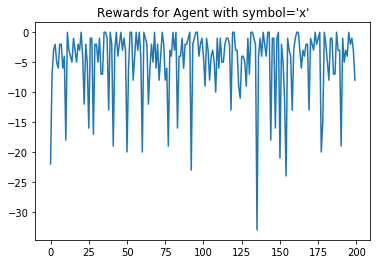

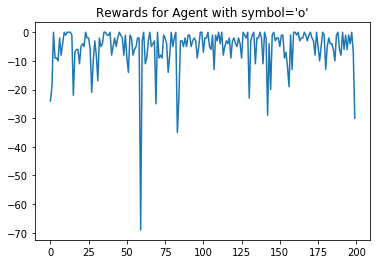

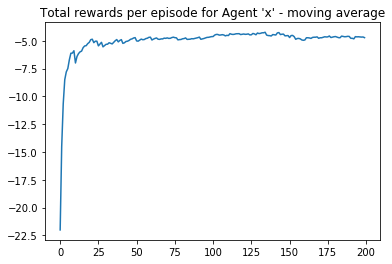

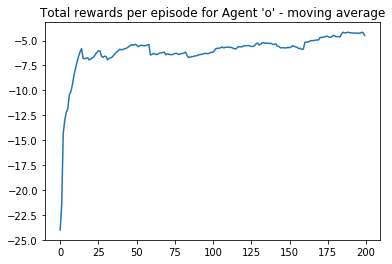

Final score board:
{'x': 89, 'o': 87, ' ': 24}


In [6]:
plot(y=total_rewards[Environment.SYMBOL_X], title="Rewards for Agent with symbol='x'", show=True)
plot(y=total_rewards[Environment.SYMBOL_O], title="Rewards for Agent with symbol='o'", show=True)

plot_moving_avg(total_rewards[Environment.SYMBOL_X], title="Total rewards per episode for Agent 'x' - moving average")
plot_moving_avg(total_rewards[Environment.SYMBOL_O], title="Total rewards per episode for Agent 'o' - moving average")

print("Final score board:")
print(env.score)

### Save best model on disk

In [9]:
# Get best model from score board

# Remove draws from score
score = {k: v for (k, v) in env.score.items() if k != Environment.sym_repr[Environment.SYMBOL_EMPTY]}

# Get best agent based on the max score recorded
best_sym = max(score.items(), key=lambda x: x[1])
best_agent = agent_x if best_sym == Environment.sym_repr[Environment.SYMBOL_X] else agent_o

print("Saving model on %s..." % path_to_model)
best_agent.save(path_to_model)


Saving model on /data/tateti_model.pkl...
